# Neuronové sítě
V tomto cvičení se zaměříme na efektivitu neuronových sítí. Naším úkolem nebude jen se seznámit se základem NN (který možná máte z jiných kurzů), ale 


## Práce s neuronovou sítí
V prvním kroce musíme načíst požadované knihovny. Budeme pracovat s knihovnou [TensorFlow](https://tesorflow.org) a rozhraním Keras, které by mělo tvořit univerzální rozhraní pro práci s NN (i s jinými frameworky jako je např PyTorch). Toto rozhraní je v nové verzi TF 2.0 implicní, ale i ve starších je podporováno. Při načítání můžeme varování týkající se zastaralosti volání funkcí ``numpy`` ignorovat, jsou způsobeny využitím starší verze TensorFlow 1.14.


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
import keras.layers as layers
from keras.optimizers import RMSprop

Using TensorFlow backend.
/home/vojta/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vojta/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vojta/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vojta/.local/lib/python3.7/site-packages/tensorflow/python/fra

Knihovny jsou úspěšně načtené. Dalším krokem bude stáhnout dataset MNIST obsahující ručně psaná čísla a který je základním benchmarkem pro NN. Tento dataset je (jako ostatní datasety) rozdělen na trénovací data a testovací data. 

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


Najdeme zde 60 tisíc testovacích a 10 tisíc testovacích obrázků 28x28 pixelů a k tomu odpovídající počet labelů (neboli odpovídajících čísel, které obrázky představují). Bude se tedy jednat o tzv. supervised learning (trénování s učitelem). Tento krátký příklad ukáže, jak data v datasetu vypadají. 

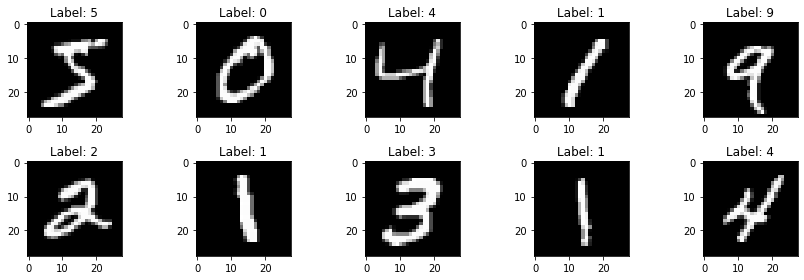

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(0, 10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i, :, :].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.title(f"Label: {y_train[i]:d}")
plt.tight_layout()


Nyní se můžeme dát do konstrukce sítě. Deklarujeme si parametry jako jsou počet batchů (dávek) a počet epoch, po které budeme trénovat

In [4]:
batch_size = 128
epochs = 5

Trénovací data jsou reprezentovány jako byty (0 - 255). My je převedeme do formátu float čísel 0 - 1 a pro MLP síť překonvertujeme 28x28 obrázky do 1D pole o délce 784.

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

60000 train samples
10000 test samples


Data jsou připravena. Konečně se dostáváme ke konstrukci požadované sítě. Vytvoříme síť plně propojených vrstev: neuronů, kde každý vezme výstupy všech neuronů v předcházející vrstvě a vynásobí je vahou. 
![mlp.png](mpl neuron)

V tomto případě použijeme síť 784-200-100-10 neuronů, kdy všechny kromě poslední budou používat ReLU aktivační funkce.

In [6]:
model = Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(784,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


Nyní můžeme model zkompilovat a spustit trénování. Tato operace může zabrat nějaký čas, zejména pokud nemáte GPU.

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
                    


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.2873 - accuracy: 0.9159 - val_loss: 0.1462 - val_accuracy: 0.9537
Epoch 2/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.1134 - accuracy: 0.9661 - val_loss: 0.1032 - val_accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.0780 - accuracy: 0.9763 - val_loss: 0.0861 - val_accuracy: 0.9737
Epoch 4/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 0.0840 - val_accuracy: 0.9744
Epoch 5/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0778 - val_accuracy: 0.9773


Model je nyní natrénovaný (na poměrně malý počet epoch). Nyní jej můžeme uložit nebo použít na jednom konkrétním obrázku. Výstupem je 10 hodnot, kdy každá říká pravděpodobnost toho, že obrázek spadá do určité kategorie. Na tomto příkladě můžeme vidět test čísla 9, kdy správně kategorie 9 má největší pravděpodobnost.

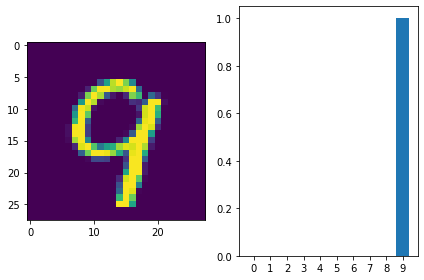

In [8]:
img = x_test[16]
est = model.predict(img.reshape(1, 784))

plt.subplot(1, 2, 1)
plt.imshow(img.reshape(28, 28), vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.bar(range(0, 10), est.reshape(10))
plt.xticks(range(0, 10))
plt.tight_layout()



In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07784294334189035
Test accuracy: 0.9772999882698059


Celý příklad pro vaše experimenty (bez testovacích obrázků) je uložen v souboru [mpl.py]